## Week 2 Part 1
### Team Info 
* Rajwant Mishra
* Md. Jalal Uddin
* Sarah Wigodsky
* Brian Liles

*Video*: [Youtube ](https://www.youtube.com/watch?v=XMDxpIXh-as)


This week's assignment is to:
1. Load a graph database of your choosing from a text file or other source. If you take a
large network dataset from the web (such as from https://snap.stanford.edu/data/), please
feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other
metric of your choosing. You may either code the functions by hand (to build your
intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your
homework submission. 

<hr>
<center> <h3> Guided Implementation </h3> </center>
<hr>

In [207]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


### About Data Source 
We are going to read data from "https://snap.stanford.edu/data/" <br>
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks. 
<table id="datatab" summary="Dataset statistics">
  <tbody><tr> <th colspan="2">Dataset statistics</th> </tr>
  <tr><td>Nodes</td> <td>4039</td></tr>
  <tr><td>Edges</td> <td>88234</td></tr>
  <tr><td>Nodes in largest WCC</td> <td>4039 (1.000)</td></tr>
  <tr><td>Edges in largest WCC</td> <td>88234 (1.000)</td></tr>
  <tr><td>Nodes in largest SCC</td> <td>4039 (1.000)</td></tr>
  <tr><td>Edges in largest SCC</td> <td>88234 (1.000)</td></tr>
  <tr><td>Average clustering coefficient</td> <td>0.6055</td></tr>
  <tr><td>Number of triangles</td> <td>1612010</td></tr>
  <tr><td>Fraction of closed triangles</td> <td>0.2647</td></tr>
  <tr><td>Diameter (longest shortest path)</td> <td>8</td></tr>
  <tr><td>90-percentile effective diameter</td> <td>4.7</td></tr>
</tbody></table>

### About Data format 
Edge List
The edge list is a simple data structure that you'll use to create the graph. Each row represents a single edge of the graph with some edge attributes. 
node1 & node2: names of the nodes connected.

This data is in the format of Edgelist which can be simply presented as Edges information in the flat file. Sample Example :
<table id="datatabEdgeList" summary="Edge List ">
  <tbody><tr> <th colspan="2">Edgelist for Facebook</th> </tr>
  <tr><th>Start from Nodes</th> <th> To Node</th></tr>
      <tr><td>0</td> <td>1</td></tr>
      <tr><td>0</td> <td>2</td></tr>
      <tr><td>0</td> <td>4</td></tr>
      <tr><td>0</td> <td>5</td></tr>
      <tr><td>1</td> <td>0</td></tr>
      <tr><td>2</td> <td>48</td></tr>
      <tr><td>2</td> <td>68</td></tr>
      <tr><td>1</td> <td>102</td></tr>
      <tr><td>2</td> <td>13</td></tr>
      <tr><td>2</td> <td>19</td></tr>
      <tr><td>2</td> <td>37</td></tr>
</tbody></table>



## Load Data 
We will write methed to load the data by passing the Edgelist file. We are using netwrokx's `read_edgelist` method to read edgelist from facebook_combined.txt file. This function retrun <b> Graph object ('networkx.classes.graph.Graph') </b> which can be used to work regualr netwrokx graph object. 

In [208]:
def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)    
    return edgeGraph
    

In [228]:
# Setting the path for edgelist file from Facebook
facePath = 'data/facebook_combined.txt'
faceGraph  = dataGraph(facePath)
type (faceGraph)
print("Converted Graph's file type is: ", type(faceGraph))

Converted Graph's file type is:  <class 'networkx.classes.graph.Graph'>


`nx.info(G)` method returns the graph info, which can be very well check against the file property from soruce `https://snap.stanford.edu/data/ego-Facebook.html`.

In [229]:
print( nx.info(faceGraph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [227]:
# This Block will tkae very long time give the data size. 
print("Diameter of the Graph Network : ", nx.diameter(faceGraph))

Diameter of the Graph Network :  8


#### Diameter of the Graph Network :  8

Here we are saying that its Graph type of Object , and 
Number of Nodes in the Graph = 4039, with total number of edges = 88234 , and Average degree of the graph ~ 44 . 
>This indicates that in the graph data collected on avergare we have ~43 frinds for each user. 

In [232]:
# We can user simple method to check the same info
nx.number_of_edges(faceGraph)

88234

### Using Panda to Read Edgelist and Build Degree Distribution 

In [235]:
# using Panda to read 
pdEdgeList = pd.read_csv(facePath, sep=" ", header=None)
pdEdgeList.head(5)

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


#### Create a Graph object

Loop through the rows of the edge list and add each edge a graph gpd. 

In [234]:
gpd = nx.Graph()  # Create Graph object

# Add edgeslist to Graph
for i, elrow in pdEdgeList.iterrows():
    gpd.add_edge(elrow[0], elrow[1])
    

In [236]:
# Function to Calcuate Degree of the Graph

def calcualte_degree(G,n = 0):
    fmdegree = []
    fmNode = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node)
            
    return fmdegree,fmNode
            

In [237]:
gpdDegree , gpdNode = calcualte_degree(gpd,0)

 > Maximum Degree of the Node in the Netwrok  `1045` and minimum degree of the node is `1`

In [238]:
# Maximum Degree of the Node in the Netwrok
max(gpdDegree)

1045

In [239]:
# # Minimum  Degree of the Node in the Netwrok 
min(gpdDegree)

1

Converting our node and Degree info into a dataframe, which we can use it latter in the analysis.

In [240]:
data = {'Node': gpdNode, 
        'Degree': gpdDegree}

df_NodeDegree = pd.DataFrame( data)
df_NodeDegree.head()

,Node,Degree
0,0,347
1,1,17
2,2,10
3,3,17
4,4,10


We can see to unsorted data of the Degree of each nodes. size 

In [241]:
df_NodeDegree.Degree.size

4039

We can pass the node info to graph object and it will return the Dict of neighbours and Edge weight. here we are passing node `1` to Graph object `gpd` , lets check the output.

In [242]:
gpd[1]

AtlasView({0: {}, 48: {}, 53: {}, 54: {}, 73: {}, 88: {}, 92: {}, 119: {}, 126: {}, 133: {}, 194: {}, 236: {}, 280: {}, 299: {}, 315: {}, 322: {}, 346: {}})

Since the graph is so dense its not making much sense, but we can see there are close to 8 very compact group in the netwrok of facebook with very few nodes in between the group. 

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


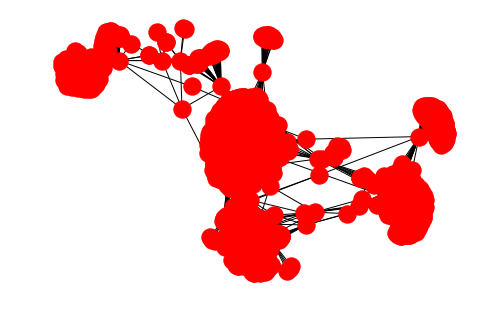

In [221]:
# Would take 5 min to Run 
nx.draw(gpd)
plt.show()

Degree of Distribution is the how many Degrees are in the given nodes. Above we create a ]  `df_NodeDegree` dataframe which hold the Node and Degree of the nodes in the key value pair. 

Degree distribution is the number of Degree and nodes representation

| No.Of Node | Degree |
| ----------- | -------- |
|4    | 10|
|8    | 20|
|4    | 10|

In [243]:
df_NodeDegree.head()

,Node,Degree
0,0,347
1,1,17
2,2,10
3,3,17
4,4,10


Below is the <i><u> top 5 Nodes </u></i> with Degree of node in Decresing order:

In [251]:
# df_NodeDegree['Degree'].hist(bins=4000)
df_NodeDegree.sort_values(by=['Degree'],ascending= False).head()

,Node,Degree
107,107,1045
351,1684,792
352,1912,755
1821,3437,547
0,0,347


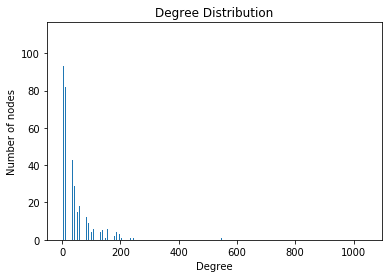

In [246]:

plt.figure() 
plt.hist(df_NodeDegree['Degree'],3500)
plt.xlabel('Degree') 
plt.ylabel('Number of nodes') 
plt.title('Degree Distribution') 
plt.savefig('Degree_Dis.png') 
plt.show()
plt.close()



From the Degree dsitribution we can see that more that 80 people in the network have Degree close to 0-10. and very few are having degree more than 200 , and very more more than 700. On the Chats they are not visible due to size of the graph. 

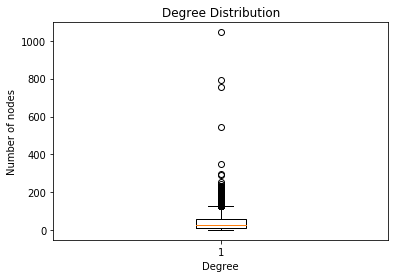

In [255]:
plt.boxplot(df_NodeDegree['Degree'])
plt.xlabel('Degree') 
plt.ylabel('Number of nodes') 
plt.title('Degree Distribution') 
plt.savefig('Degree_Box.png') 
plt.show()
plt.close()


#### Lets list the Nodes with Degree greater than 500.

In [259]:
df_NodeDegree[df_NodeDegree.Degree>=500]

,Node,Degree
107,107,1045
351,1684,792
352,1912,755
1821,3437,547


> Below pictures shows here are the connection between nodes in facebook data. The nodes are connected to almost everyone but they are cluested with few groups which are more densly connected. 


![Gephi1.PNG](https://raw.githubusercontent.com/Rajwantmishra/620Group/master/W2-P1/Gephi2.PNG)